The Fourier transform occurs in many different versions throughout classical computing, in areas ranging from signal processing to data compression to complexity theory. The quantum Fourier transform (QFT) is the quantum implementation of the discrete Fourier transform over the amplitudes of a wave function. It is part of many quantum algorithms, most notably Shor's factoring algorithm and quantum phase estimation.

In [3]:
import math
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram

 For the three-qubit case:

`q = QuantumRegister(3)`

`c = ClassicalRegister(3)`

`qft3 = QuantumCircuit(q, c)`

`qft3.h(q[0])`

`qft3.cu1(math.pi/2.0, q[1], q[0]) # CROT_2 from q[1] to q[0]`

`qft3.cu1(math.pi/4.0, q[2], q[0]) # CROT_3 from q[2] to q[0]`

`qft3.h(q[1])`

`qft3.cu1(math.pi/2.0, q[2], q[1]) # CROT_2 from q[2] to q[1]`

`qft3.h(q[2])`

Following the above example, the case for n-qubits can be generalized as:

In [5]:
def qft(circ, q, n):
    """n-qubit QFT on q in circ."""
    for j in range(n):
        circ.h(q[j])
        for k in range(j+1,n):
            circ.cu1(math.pi/float(2**(k-j)), q[k], q[j])

In [6]:
def input_state(circ, q, n):
    """n-qubit input state for QFT that produces output 1."""
    for j in range(n):
        circ.h(q[j])
        circ.u1(math.pi/float(2**(j)), q[j]).inverse()

A QFT on a prepared three-qubit input state that should return 111.

OPENQASM 2.0;
include "qelib1.inc";
qreg x[3];
creg c[3];
h x[0];
u1(3.14159265358979) x[0];
h x[1];
u1(1.57079632679490) x[1];
h x[2];
u1(0.785398163397448) x[2];



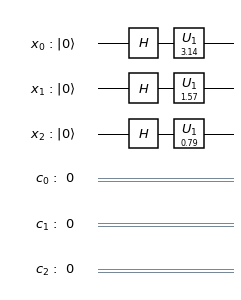

In [10]:
q = QuantumRegister(3, 'x')
c = ClassicalRegister(3, 'c')
qft3 = QuantumCircuit(q, c)

# first, prepare the state that should return 111 and draw that circuit:
input_state(qft3, q, 3)

print(qft3.qasm())
qft3.draw(output='mpl')

 a QFT on the prepared state and drawing the entire circuit:

OPENQASM 2.0;
include "qelib1.inc";
qreg x[3];
creg c[3];
h x[0];
u1(3.14159265358979) x[0];
h x[1];
u1(1.57079632679490) x[1];
h x[2];
u1(0.785398163397448) x[2];
h x[0];
cu1(1.57079632679490) x[1],x[0];
cu1(0.785398163397448) x[2],x[0];
h x[1];
cu1(1.57079632679490) x[2],x[1];
h x[2];
measure x[0] -> c[0];
measure x[1] -> c[1];
measure x[2] -> c[2];



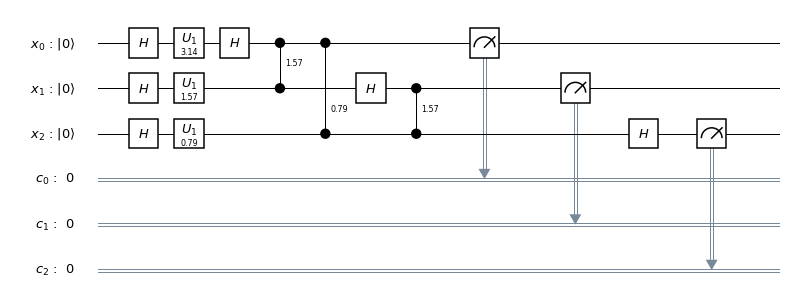

In [8]:
qft(qft3, q, 3)
for i in range(3):
    qft3.measure(q[i], c[i])

print(qft3.qasm())
qft3.draw(output='mpl')

In [9]:
backend = Aer.get_backend("qasm_simulator")

simulate = execute(qft3, backend=backend, shots=1024).result()
simulate.get_counts()

{'111': 1024}

We indeed see that the outcome is always 111 when we execute the code on the simulator.